In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import sys

In [4]:
#-------------------------------------------------------------------
# Directories and local functions
#-------------------------------------------------------------------
voldir = '/Volumes/SamT5/PhD/data/'
mdir = voldir + 'moorings/dragomir_phd/'
topodir = voldir + 'topog/'

localdir = '/Users/ocd1n16/PhD_local/'

auxscriptdir = localdir + 'scripts/aux_func/'
sys.path.append(auxscriptdir)
import aux_func_trend as fc


def unit_vector(vector):
    """ Returns the unit vector of the vector."""
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """Finds angle between two vectors"""
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

A = np.array([ 0 , -1])

theta = np.radians(90)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c,-s), (s, c)))

A = np.dot(R, A)

In [3]:
#------------------------------------
# limits for mooring data
#------------------------------------
moor_start = '2010-03-01'
moor_end = '2015-12-01'

# S1 mooring data
mfile = 's1_raw_uv_hourly_adcp_404m_532m_2010_2016.nc'

with xr.open_dataset(mdir_dt + mfile) as s1moor:
    print(s1moor.keys())
    
s1_avg = s1moor.mean('depth').sel(time=slice(moor_start, moor_end))

# projection in rotated frame
s1_rot = fc.rotate_frame(s1_avg.u, s1_avg.v, 42, 'clockwise')

# average monthly
ms1 = s1_rot.resample(time='1MS').mean()

ms1_mdt = ms1.sel(time=slice('2011-01-01', '2015-12-31')).mean("time")
ms1_clim = ms1.sel(time=slice('2011-01-01', '2015-12-31')).groupby("time.month").mean()

ms1_anom = ms1 - ms1_mdt
ms1_mclim = ms1.groupby("time.month") - ms1_clim

KeysView(<xarray.Dataset>
Dimensions:  (time: 51839, depth: 17)
Coordinates:
  * time     (time) datetime64[ns] 2010-02-15T15:00:00 ... 2016-01-17T03:00:00
  * depth    (depth) float64 404.0 412.0 420.0 428.0 ... 508.0 516.0 524.0 532.0
Data variables:
    u        (time, depth) float64 ...
    v        (time, depth) float64 ...
Attributes:
    lon:      -116.358
    lat:      -72.468)


In [5]:
#------------------------------------------------------------------
#            ~ ~ ~    OTHER MOORINGS     ~ ~ ~   
#------------------------------------------------------------------
bsr14 = xr.open_dataset(mdir + 'bsr14.nc') #388

bsr12_0 = xr.open_dataset(mdir + 'bsr12_0.nc') #depth: 400
bsr12_1 = xr.open_dataset(mdir + 'bsr12_1.nc') #depth: 553

bsr13a = xr.open_dataset(mdir + 'bsr13a.nc') #338

istar1 = xr.open_dataset(mdir + 'istar1.nc') # 581
istar4 = xr.open_dataset(mdir + 'istar4.nc') #485

istar5_0 = xr.open_dataset(mdir + 'istar5_0.nc')
istar5_1 = xr.open_dataset(mdir + 'istar5_1.nc')
istar5_2 = xr.open_dataset(mdir + 'istar5_2.nc')

troughW0 = xr.open_dataset(mdir + 'troughW0.nc') # 423
troughW1 = xr.open_dataset(mdir + 'troughW1.nc') # 555

troughE0 = xr.open_dataset(mdir + 'troughE0.nc') # 555 
troughE1 = xr.open_dataset(mdir + 'troughE1.nc') # 595

## mean current direction

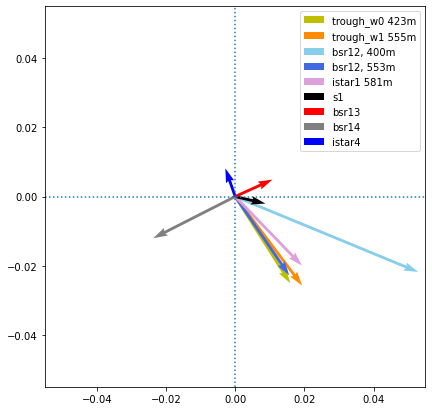

In [15]:
fig, ax = plt.subplots(figsize=(7,7))
ax.quiver(troughW0.u.mean('time').values, 
          troughW0.v.mean('time').values,
          color='y', scale=21, label='trough_w0 423m')
ax.quiver(troughW1.u.mean('time').values, 
          troughW1.v.mean('time').values,
          color='darkorange', scale=21, label='trough_w1 555m')
ax.quiver(bsr12_0.u.mean('time').values, 
          bsr12_0.v.mean('time').values,
          color='skyblue', scale=21, label='bsr12, 400m')
ax.quiver(bsr12_1.u.mean('time').values,
          bsr12_1.v.mean('time').values,
          color='royalblue', scale=21, label='bsr12, 553m')
ax.quiver(istar1.u.mean('time').values, 
          istar1.v.mean('time').values,
          color='plum', scale=21, label='istar1 581m')
ax.quiver(ms1.u.mean('time').values*1e2, 
          ms1.v.mean('time').values*1e2,
          color='k', scale=21, label='s1')
ax.quiver(bsr13a.u.mean('time').values, 
          bsr13a.v.mean('time').values,
          color='r', scale=21, label='bsr13')
ax.quiver(bsr14.u.mean('time').values, 
          bsr14.v.mean('time').values,
          color='grey', scale=21, label='bsr14')
ax.quiver(istar4.u.mean('time').values, 
          istar4.v.mean('time').values,
          color='b', scale=21, label='istar4')
ax.axhline(0, ls=':')
ax.axvline(0, ls=':')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_aspect('equal')

## mean current speed

In [16]:
def moor_speed(moor):
    print("mean_u: ", moor.u.values.mean())
    print("mean_v: ", moor.v.values.mean())
    print("mean_speed: ", np.mean(np.sqrt(moor.u.values**2 + moor.v.values**2)))

print(">> bsr14")
moor_speed(bsr14)

print("\n>> bsr12_1")
moor_speed(bsr12_1)

print("\n>> bsr13a")
moor_speed(bsr13a)

print("\n>> istar1")
moor_speed(istar1)

print("\n>> istar4")
moor_speed(istar4)

print("\n>> istar5_1")
moor_speed(istar5_1)

print("\n>> troughW_0")
moor_speed(troughW0)

print("\n>> troughE_0")
moor_speed(troughE0)

>> bsr14
mean_u:  -4.522767348594876
mean_v:  -2.298866164642029
mean_speed:  5.258111517654728

>> bsr12_1
mean_u:  2.981183227435433
mean_v:  -4.344480048037639
mean_speed:  5.29387532873893

>> bsr13a
mean_u:  2.0537845328254805
mean_v:  0.9345901142815602
mean_speed:  2.5552838827814646

>> istar1
mean_u:  3.679055733350433
mean_v:  -3.810070102813422
mean_speed:  5.314848738591906

>> istar4
mean_u:  -0.5440729681281491
mean_v:  1.5562701555792764
mean_speed:  1.8653165005026309

>> istar5_1
mean_u:  3.8347134928829196
mean_v:  -0.4885986373458017
mean_speed:  4.4475858107202235

>> troughW_0
mean_u:  3.038236069944917
mean_v:  -4.782173944793849
mean_speed:  5.703780253823436

>> troughE_0
mean_u:  7.939112907279512
mean_v:  -6.274679475006093
mean_speed:  10.392023479434135
